Name: Mohammad Javad Maheronnaghsh

**Part 1**

 Write two functions named "camera_matrix" and "camera_projection". The first one gets all the camera parameters, containing λ, f (focal length), Sx, Sy, Sθ, Ox, Oy, R, T, and returns the camera matrix (Please provide comments above each stage of transformation). The second function projects a given 3D point on image and returns a 2D point in pixel coordinates.

In [6]:
import numpy as np
def camera_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, R, T):

    # Intrinsic matrix (K): These are the internal parameters of our camera
    K = np.array([[f*Sx, S_theta, Ox],
                  [0, f*Sy, Oy],
                  [0, 0, 1]]) / landa

    # Extrinsic matrix (RT): These are the external parameteres of our camera
    RT = np.hstack((R, T.reshape((3, 1))))
    # Camera matrix (Output) = Intrinsic matrix * Extrinsic matrix
    # In simple words, we are considering both internal and external features
        # for out camera
    camera_matrix = np.dot(K, RT)

    # return matrix
    return camera_matrix
    

def camera_projection(X, Y, Z, matrix):
    # Homogeneous coordinates for the 3D point
    # In this line, we create the 3d point from x-y-z coordinates
    point_3d = np.array([X, Y, Z, 1])

    # Project the 3D point to 2D (using camera matrix)
    point_2d = np.dot(matrix, point_3d)

    # Normalize the coordinates
    x = point_2d[0] / point_2d[2]
    y = point_2d[1] / point_2d[2]
    return x, y


**Part 2**

Consider a pinhole camera with center located at (1, 1, -3), which its focal length is 100, scale factors (Sx, Sy) are both 1 and pixel coordinates of principal point is (50, 50). Also skew parameter is zero. The angle of the camera is such that the optical axis of the camera is parallel to the z axis. Using the previous function obtain the whole camera matrix.

In [9]:
# Parameters
landa = 1
f = 100 # focal length
Sx = 1 # Scale for X
Sy = 1 # Scale for Y
S_theta = 0 # skew_parameter
Ox = 50 # Pixel Coordinate for X
Oy = 50 # Pixel Coordinate for Y

# Translation
t = np.array([-1, -1, 3])

# Rotation 
# the rotation matrix is the identity matrix
# Why? Because: optical axis || z-axis
r = np.eye(3)

# Camera matrix Calculation
camera_matrix_result = camera_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, r, t)

print("Camera Matrix:")
print(camera_matrix_result)

Camera Matrix:
[[100.   0.  50.  50.]
 [  0. 100.  50.  50.]
 [  0.   0.   1.   3.]]


**Part 3**

Suppose that vector V: (0, 1, 1) is located at (1, 1, 3) in 3D space. Apply the obtained camera matrix to V. Plot the result in pixel coordinates in a 2D plot. From which step of projection the length of the vector changes?

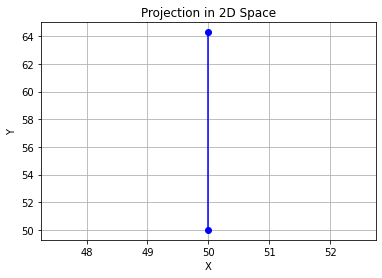

In [14]:
import matplotlib.pyplot as plt


# Apply the camera matrix to the 3D vector
x_vals = []
y_vals = []

# Project 1st point
point1 = camera_projection(1, 1, 3, camera_matrix_result)
x_vals.append(point1[0])
y_vals.append(point1[1])

# Project 2nd point
point2 = camera_projection(1+0, 1+1, 3+1, camera_matrix_result)
x_vals.append(point2[0])
y_vals.append(point2[1])

# Plotting the results
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b')
plt.title('Projection in 2D Space')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


**Part 4**

If the camera is rotated by +25 degrees around x axis, how would R and T change? What would the final image be?



New R:
[[ 1.          0.          0.        ]
 [ 0.          0.90630779 -0.42261826]
 [ 0.          0.42261826  0.90630779]]


New Camera Matrix:
[[100.          21.13091309  45.31538935  50.        ]
 [  0.         111.76169179   3.05356318  50.        ]
 [  0.           0.42261826   0.90630779   3.        ]]




2D Projection of 1st point: x = 50.00, y = 27.83

2D Projection of 1st point: x = 50.00, y = 38.25


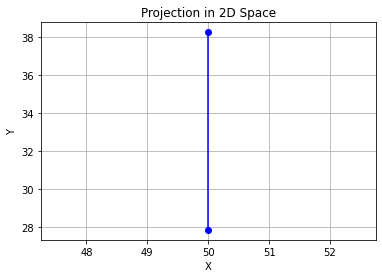

In [23]:
# Define new rotation
rotation_angle_degrees = 25
rotation_angle_radians = np.radians(rotation_angle_degrees)
r2 = np.array([[1, 0, 0],[0, np.cos(rotation_angle_radians), -np.sin(rotation_angle_radians)],[0, np.sin(rotation_angle_radians), np.cos(rotation_angle_radians)]])

# Update new Rotation
r_new=np.dot(r, r2)

# Update new camera matrix
camera_matrix_new = camera_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, r_new, t)

# 2D Projection
point1 = camera_projection(1, 1, 3, camera_matrix_new)
point2 = camera_projection(1+0, 1+1, 3+1, camera_matrix_new)

# Print new Rotation Matrix - T is the same
print("\n\nNew R:")
print(r_new)

# Print new Camera Matrix
print("\n\nNew Camera Matrix:")
print(camera_matrix_new)

# Display the result of projecting the vector V onto the image plane
print('\n\n')
print(f"\n2D Projection of 1st point: x = {point1[0]:.2f}, y = {point1[1]:.2f}")
print(f"\n2D Projection of 1st point: x = {point2[0]:.2f}, y = {point2[1]:.2f}")


# Apply the camera matrix to the 3D vector
x_vals = []
y_vals = []

x_vals.append(point1[0])
y_vals.append(point1[1])

x_vals.append(point2[0])
y_vals.append(point2[1])

# Plotting the results
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b')
plt.title('Projection in 2D Space')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
